Load in packages

In [1]:
%matplotlib inline

from parasol.filestructure import FileStructure
from parasol.analysis.grapher import Grapher
from parasol.analysis.analysis import Analysis

import matplotlib as mpl
from matplotlib import pyplot as plt

Initialize packages

In [2]:
filestructure = FileStructure()
grapher = Grapher()
analysis = Analysis()

Set root directory, pull data

In [3]:
# Set Root Directory (folder that holds test folders)
root_dir = 'C:\\Users\\seand\\Documents\\Data\\OutDoorTest'
# root_dir = None

# Get a list of 'test' folders in that folder
test_folders = filestructure.get_tests(rootdir=root_dir)

# Get list of file in each folder, seperated by test
analyzed_files = filestructure.get_files(test_folders, "Analyzed")
mpp_files = filestructure.get_files(test_folders, "MPP")
jv_files = filestructure.get_files(test_folders, "JV")

Workup missing workups

In [4]:
#analysis.analyze_from_savepath(stringpath = testfolders[0]

Load Data

In [5]:
# mpp_t, mpp_v, mpp_i, mpp_j, mpp_p = analysis.load_mpp_files(mpp_file_paths=mpp_files)
# jv_t, jv_v, jv_j_fwd, jv_p_fwd, jv_j_rev, jv_p_rev = analsysis.load_jv_files(jv_file_paths=jv_files)

# file_dict = {}
# for file in analyzed_files:
    # scalar_df = pd.read_csv(file)
    # file_dict[file] = scalar_df

    

# Print DF datanames
# print(scalar_df.keys())

Set Variables for Plots

In [6]:
# Print Parameters Availible to plot
#print(grapher.variable_dict.keys())

files_to_plot = analyzed_files
y_axis = "FWD Jsc"
y2_axis = "REV Jsc"
x_axis = "Time Elapsed"
z_axis = "FWD Voc"

Create 1 Figure showing data from series (xy_scalars example)

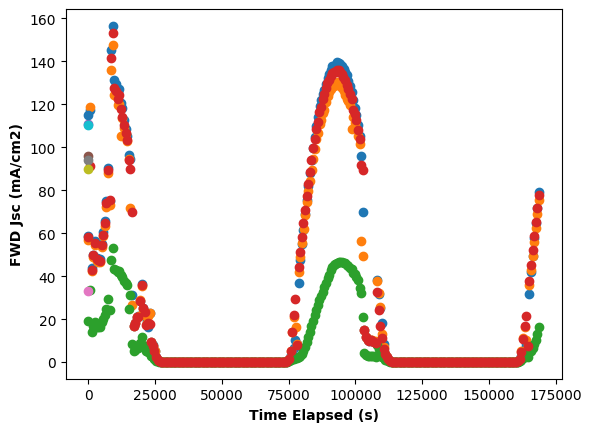

In [7]:
# Create Figure
figure, axes = plt.subplots(1)

# Cycle through each testfile
for sublist in files_to_plot:
    
    # Cycle through each file
    for file in sublist: 
        
        # Plot
        grapher.plot_xy_scalars(
            paramfiles = [file],
            x = grapher.variable_dict[x_axis], 
            y = grapher.variable_dict[y_axis],
            ax = axes, 
            )
    
# Show plot
figure #.show()

Create 1 Figure showing data from series (xy2_scalars example)

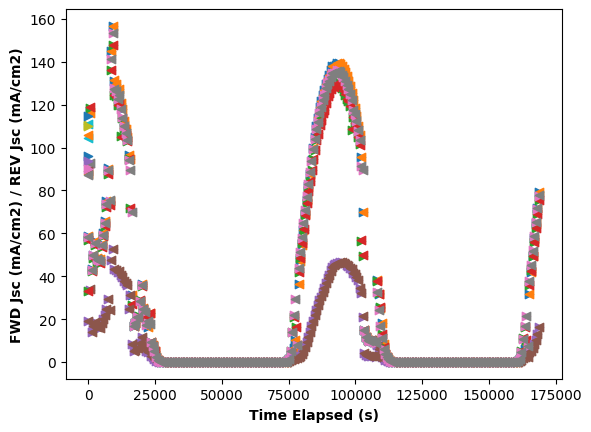

In [8]:
# Create Figure
figure, axes = plt.subplots(1)

# Cycle through each testfile
for sublist in files_to_plot:
    
    # Cycle through each file
    for file in sublist: 
        
        # Plot
        grapher.plot_xy2_scalars(
            paramfiles = [file],
            x = grapher.variable_dict[x_axis], 
            ys = [grapher.variable_dict[y_axis], grapher.variable_dict[y2_axis]],
            ax = axes, 
            )
        
figure

Create multiple figures shwing data from series (plot_xyz_scalar example)

In [9]:
# Cycle through each testfile
for sublist in files_to_plot:
    
    figure, axes = plt.subplots(1)
    
    # Cycle through each file
    for file in sublist: 
        
        # Plot
        grapher.plot_xyz_scalar(
            paramfile = file,
            x = grapher.variable_dict[x_axis], 
            y = grapher.variable_dict[y_axis],
            z = grapher.variable_dict[z_axis], 
            ax = axes,
            )
    
    figure

c:\users\seand\code\parasol\parasol\analysis\grapher.py:400: RuntimeWarning: invalid value encountered in true_divide
  (zval - np.nanmin(zval)) / (np.nanmax(zval) - np.nanmin(zval))
